In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/kkk/twitter_collected.csv", header = 0, encoding='utf-8-sig')

In [4]:
df

,text,label
0,الله وكيلك مشحطط اهل دابوق و دير غبار و عبدون ...,0
1,تفوووو عليك\n,0
2,ربنا يثبته\n,1
3,من الي ضاحك عليهم انو اصواتهم حلوة\n,0
4,وان مدحتك بالقصائد ماوفيت\n,1
...,...,...
1995,يا رب فرج\n,1
1996,والله انو نذل \n,0
1997,اخ يا غبي \n,0
1998,غبي\n,0


In [ ]:
# df.rename(columns={'text':'texts' ,'label':'data_labels'}, inplace = True)

In [ ]:
# df['text'] =df['texts']

In [ ]:
# df = df.drop('texts', axis=1)

In [5]:
# df['labels'] = df['data_labels'].replace({'negative': 0, 'positive': 1})
df['labels'] = df['label']


In [6]:
df = df.drop('label', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1999 non-null   object
 1   labels  2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<Axes: xlabel='labels', ylabel='count'>

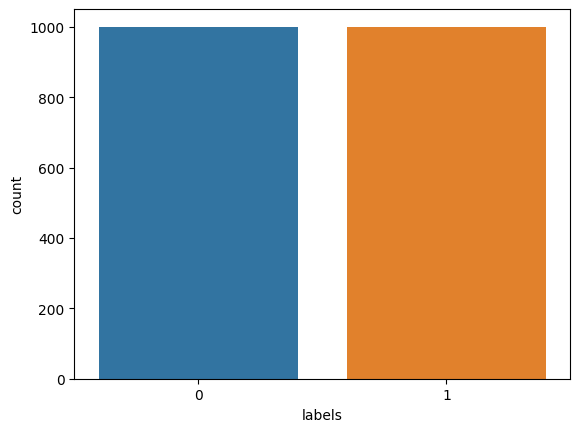

In [8]:
import seaborn as sns

sns.countplot(x=df["labels"])

In [9]:
from sklearn.model_selection import train_test_split
# Split data into train and eval DataFrames
train_df, eval_df = train_test_split(df, test_size=0.2, random_state=42)

# Print the shapes of train_df and eval_df
print("Train DataFrame shape:", train_df.shape)
print("Eval DataFrame shape:", eval_df.shape)

Train DataFrame shape: (1600, 2)
Eval DataFrame shape: (400, 2)


In [10]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 113.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.7/211.7 kB 19.9 MB/s eta 0:00:0

In [11]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import pandas as pd
import logging


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

"""# Preparing train data
train_data = [
    ["Aragorn was the heir of Isildur", 1],
    ["Frodo was the heir of Isildur", 0],
    ["Pippin is stronger than Merry", 2],
]
train_df = pd.DataFrame(train_data)
train_df.columns = ["text", "labels"]

# Preparing eval data
eval_data = [
    ["Aragorn was the heir of Elendil", 1],
    ["Sam was the heir of Isildur", 0],
    ["Merrry is stronger than Pippin", 2],
]
eval_df = pd.DataFrame(eval_data)
eval_df.columns = ["text", "labels"]"""

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=4)

# Create a ClassificationModel
model = ClassificationModel(
    'bert',
    'asafaya/bert-base-arabic',
    num_labels=2,
    args=model_args,
    # use_cuda= False
)

# Train the model
model.train_model(train_df)

# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

# Make predictions with the model
#predictions, raw_outputs = model.predict(["Sam was a Wizard"])


Some weights of the model checkpoint at asafaya/bert-base-arabic were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at asafaya/bert-base-arabic and are newly initialized: ['classifier.bias', 'classifier.we

  0%|          | 0/1600 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/200 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/50 [00:00<?, ?it/s]

In [12]:
result

{'mcc': 0.8504014187415969,
 'tp': 183,
 'tn': 187,
 'fp': 18,
 'fn': 12,
 'auroc': 0.9614383989993746,
 'auprc': 0.9504801737245275,
 'eval_loss': 0.43056192100048063}

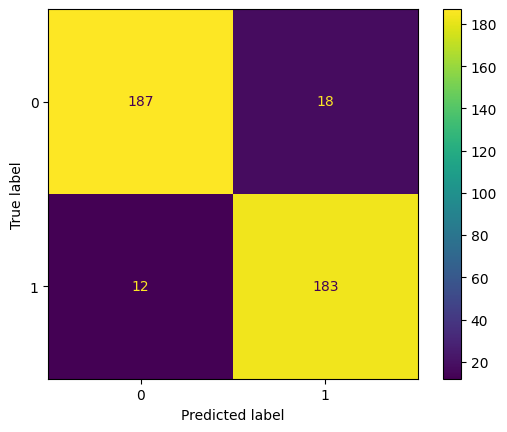

In [13]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay ,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
prediction= model_outputs.argmax(axis=1)
true_labels = eval_df['labels'].values
ConfusionMatrixDisplay.from_predictions(true_labels, prediction)
plt.show()

In [ ]:
predictions, raw_outputs = model.predict(["الموت"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

array([0])

In [ ]:
!zip -r /content/outputs.zip /content/outputs

In [ ]:
from google.colab import files
files.download('/content/outputs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>